In [162]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

In [163]:
plt.style.use('dark_background')

In [164]:
def get_diff_matrix(data_prev, data_next, weights = 1):
    a = np.stack([data_prev]*len(data_next), 0)
    b = np.stack([data_next]*len(data_prev), 0)
    axies = [i for i in range(len(b.shape))]
    axies[0], axies[1] = axies[1], axies[0]
    b = np.transpose(b, axies)
    return (a - b)*weights

def add_axi(a):
    return np.reshape(a, [*a.shape, 1])

In [165]:
activity = pd.read_csv('./a.csv', index_col=0).to_numpy()

In [166]:
activity.shape

(500, 40)

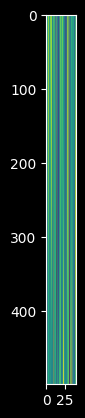

In [167]:
plt.imshow(activity)
plt.show()

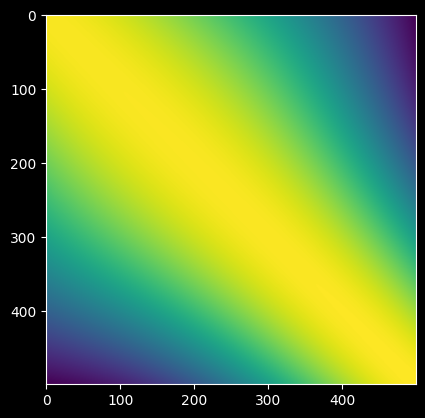

In [168]:
dot_products = activity @ activity.T
dot_products = dot_products
plt.imshow(dot_products)
plt.show()

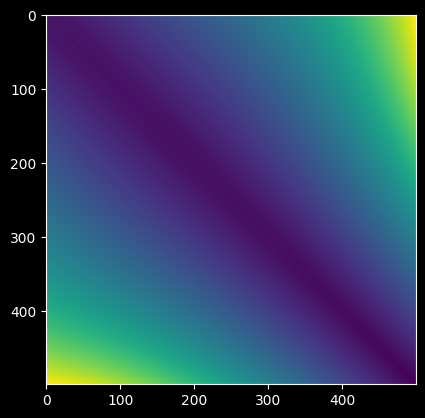

In [169]:
dot_products = 1 / dot_products
dot_products = dot_products - dot_products.min()
dot_products /= dot_products.max()
#dot_products *= (1 - np.eye(dot_products.shape[0]))
#dot_products = (1 - dot_products)
dot_products = dot_products**(0.5)
plt.imshow(dot_products)
plt.show()

In [170]:
def embd(low_dim, distances, dt = 0.00001, epochs = 100, precision = 0.000001):
    N = distances.shape[1]
    distances = add_axi(distances)
    x = np.random.uniform(-1, 1, (N, low_dim))
    last_one = 100001
    for e in range(epochs):
        vectors = get_diff_matrix(x, x)
        lenghts = add_axi((vectors**2).sum(-1)**0.5) + 0.0001
        #lenghts = distances - add_axi((vectors**2).sum(-1)**0.5)
        x += (distances*vectors/lenghts - vectors).sum(0)*dt
        loss = loss = (lenghts**2).mean()
        if e % 10 == 0:
            print(f"{e}_energy: ",loss)
        if e != 0 and abs(last_one - loss) < precision:
            print("changes in energy less than precision => stopping")
            break
        last_one = loss
    print(f"final_{e}_energy: ",loss)

    return x

0_energy:  13.148941592654923
10_energy:  11.991344976489756
20_energy:  10.939854985016012
30_energy:  9.984561353044032
40_energy:  9.11648883361641
50_energy:  8.327508511739607
60_energy:  7.610257553183168
70_energy:  6.958066584934591
80_energy:  6.364893980476254
90_energy:  5.825266392326712
100_energy:  5.334224936959558
110_energy:  4.887276493908106
120_energy:  4.480349632153715
130_energy:  4.109754723295026
140_energy:  3.772147842970963
150_energy:  3.4644980999841413
160_energy:  3.1840580669247758
170_energy:  2.9283370171736993
180_energy:  2.6950767012787757
190_energy:  2.4822294211346305
200_energy:  2.2879381834065433
210_energy:  2.1105187344568908
220_energy:  1.9484432978658532
230_energy:  1.8003258526763224
240_energy:  1.6649088059073471
250_energy:  1.5410509268257506
260_energy:  1.4277164230818942
270_energy:  1.3239650502296714
280_energy:  1.2289431564772142
290_energy:  1.14187557385732
300_energy:  1.0620582754589571
310_energy:  0.988851726008275
320

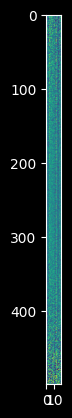

In [171]:
q = embd(20, dot_products, epochs = 1000)
plt.imshow(q)
plt.show()

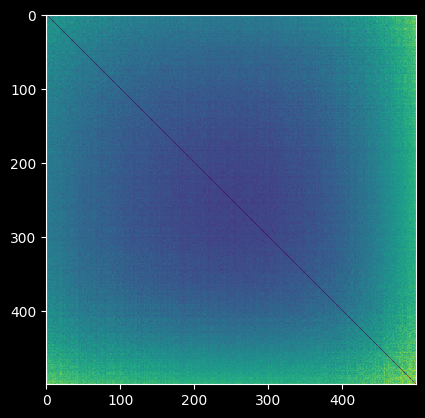

0.7878023881435942


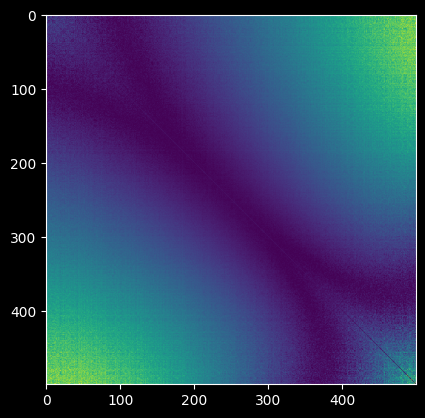

In [172]:
g = get_diff_matrix(q, q)
plt.imshow((g**2).sum(-1)**0.5)
plt.show()
t = np.abs((g**2).sum(-1) - dot_products)
print(t.max())
plt.imshow(t)
plt.show()